
#### Nombre: Antonio Elias Sánchez Soto
#### Grupo: BDFC301
#### Nota:




El conjunto de datos AIDS Clinical Trials Group Study 175 contiene información médica y demográfica de pacientes diagnosticados con SIDA en los Estados Unidos. El dataset incluye 2,139 instancias y 23 características relacionadas con tratamientos, resultados médicos, datos demográficos y de laboratorio. El objetivo principal del dataset es evaluar la efectividad de diferentes tipos de tratamientos antirretrovirales, y el objetivo de predicción es determinar si un paciente falleció en un periodo específico o no.

In [45]:
#!pip install ucimlrepo

In [46]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Fetch dataset
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890)

# Data (features and target)
X = aids_clinical_trials_group_study_175.data.features
y = aids_clinical_trials_group_study_175.data.targets

# Combine features (X) and target (y) into a single DataFrame
data = pd.concat([X, y], axis=1)

# Display the first few rows of the combined DataFrame
data

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091,3,21,53.2980,1,0,0,100,0,1,...,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,...,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,...,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,...,0,1,0,0,0,166,169,999,1838,1


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21  cd80     2139 


### 1. Se requiere realizar un análisis inicial del dataset para garantizar que esté limpio y listo para su uso. Responda las siguientes preguntas:

a) ¿Existen valores faltantes en el dataset? Proporcione una estrategia para tratarlos.



In [ ]:
data.isnull().sum()
#con esta estrategia obtenemos la cantidad de valores nulos por columna. se obtiene que no hay valores nulos.

time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
zprior     0
preanti    0
race       0
gender     0
str2       0
strat      0
symptom    0
treat      0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
cid        0
dtype: int64

b) Genere un gráfico de dispersión que relacione dos variables continuas del dataset.

<Axes: xlabel='time', ylabel='wtkg'>

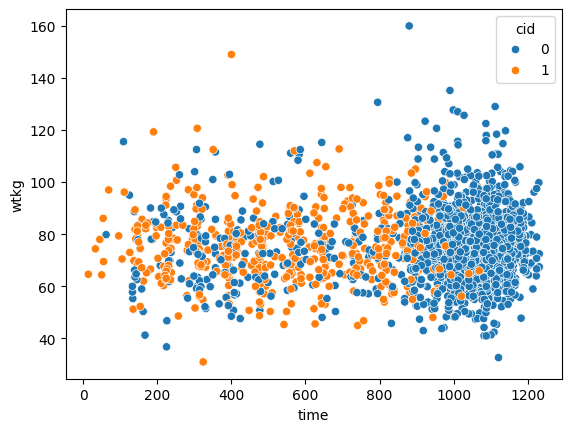

In [ ]:
sns.scatterplot(x='time',y='wtkg',hue='cid', data=data)
#las variables continuas referidas al tiempo y peso de cada paciente en función de la variable objeto de estudio cid(referida al fallecimiento o no del paciente en el tiempo analizado)

c) Aplique normalización (escalado al rango [0, 1]) a todas las variables continuas del dataset. Explique cómo la normalización puede afectar el rendimiento de algoritmos de machine learning.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
dfEscalado=scaler.fit_transform(data)
df=pd.DataFrame(dfEscalado,columns=data.columns)
df.describe()

#el objetivo de la normalización es establecer un rango para todas las variables donde la proporción se refleje adecuadamente y no afecte las decisiones del futuro modelo desarrollado. El método empleado en esta ocasión es la estandarización, donde se resta a cada elemento la media y se divide entre la desviación estándar.

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
count,2.139000e+03,2.139000e+03,2.139000e+03,2.139000e+03,2.139000e+03,2.139000e+03,2.139000e+03,2.139000e+03,2.139000e+03,2.139000e+03,...,2.139000e+03,2.139000e+03,2.139000e+03,2.139000e+03,2.139000e+03,2.139000e+03,2.139000e+03,2.139000e+03,2.139000e+03,2.139000e+03
mean,1.229083e-16,-9.467259e-17,2.790350e-16,-3.288627e-16,2.657476e-17,9.301167e-17,7.972429e-17,6.577254e-16,-6.643691e-18,7.308060e-17,...,-8.304614e-17,2.325292e-17,3.321845e-17,1.660923e-18,-5.439522e-17,-4.650584e-17,1.710750e-16,9.135075e-17,-1.195864e-16,-4.152307e-17
std,1.000234e+00,1.000234e+00,1.000234e+00,1.000234e+00,1.000234e+00,1.000234e+00,1.000234e+00,1.000234e+00,1.000234e+00,1.000234e+00,...,1.000234e+00,1.000234e+00,1.000234e+00,1.000234e+00,1.000234e+00,1.000234e+00,1.000234e+00,1.000234e+00,1.000234e+00,1.000234e+00
min,-2.960576e+00,-1.348678e+00,-2.670067e+00,-3.327685e+00,-3.031231e-01,-1.396547e+00,-3.888932e-01,-4.313250e+00,-1.498884e-01,-1.106116e+00,...,-1.189210e+00,-1.090177e+00,-4.573376e-01,-1.738009e+00,-7.545412e-01,-2.956664e+00,-2.228940e+00,-1.971789e+00,-1.823827e+00,-5.674526e-01
25%,-5.205170e-01,-4.618590e-01,-7.176127e-01,-6.369585e-01,-3.031231e-01,-1.396547e+00,-3.888932e-01,-9.231924e-01,-1.498884e-01,-1.106116e+00,...,-1.189210e+00,-1.090177e+00,-4.573376e-01,5.753709e-01,-7.545412e-01,-7.339013e-01,-7.075130e-01,-6.928503e-01,-6.830499e-01,-5.674526e-01
50%,4.034887e-01,4.249600e-01,-1.433615e-01,-5.542285e-02,-3.031231e-01,7.160516e-01,-3.888932e-01,7.718364e-01,-1.498884e-01,9.040643e-01,...,8.408941e-01,2.236527e-02,-4.573376e-01,5.753709e-01,-7.545412e-01,-8.858297e-02,-1.266045e-01,-1.950223e-01,-1.581799e-01,-5.674526e-01
75%,7.251796e-01,1.311779e+00,5.457400e-01,5.603208e-01,-3.031231e-01,7.160516e-01,-3.888932e-01,7.718364e-01,-1.498884e-01,9.040643e-01,...,8.408941e-01,1.134907e+00,-4.573376e-01,5.753709e-01,1.325309e+00,6.115663e-01,6.133622e-01,4.590278e-01,4.745864e-01,-5.674526e-01
max,1.204294e+00,1.311779e+00,3.991248e+00,6.396202e+00,3.298990e+00,7.160516e-01,2.571400e+00,7.718364e-01,6.671629e+00,9.040643e-01,...,8.408941e-01,1.134907e+00,2.186568e+00,5.753709e-01,1.325309e+00,7.157541e+00,5.170727e+00,8.382617e+00,1.146314e+01,1.762262e+00


### 2. El propósito de este análisis es determinar las características más significativas del dataset en relación con la variable objetivo (cid) y analizar cómo estas pueden contribuir a la creación de un conjunto de datos optimizado para el modelado. Responda las siguientes preguntas:

a) ¿Cómo se relacionan las variables continuas con la variable objetivo (cid)? Calcule la matriz de correlación para identificar estas relaciones.



<Axes: >

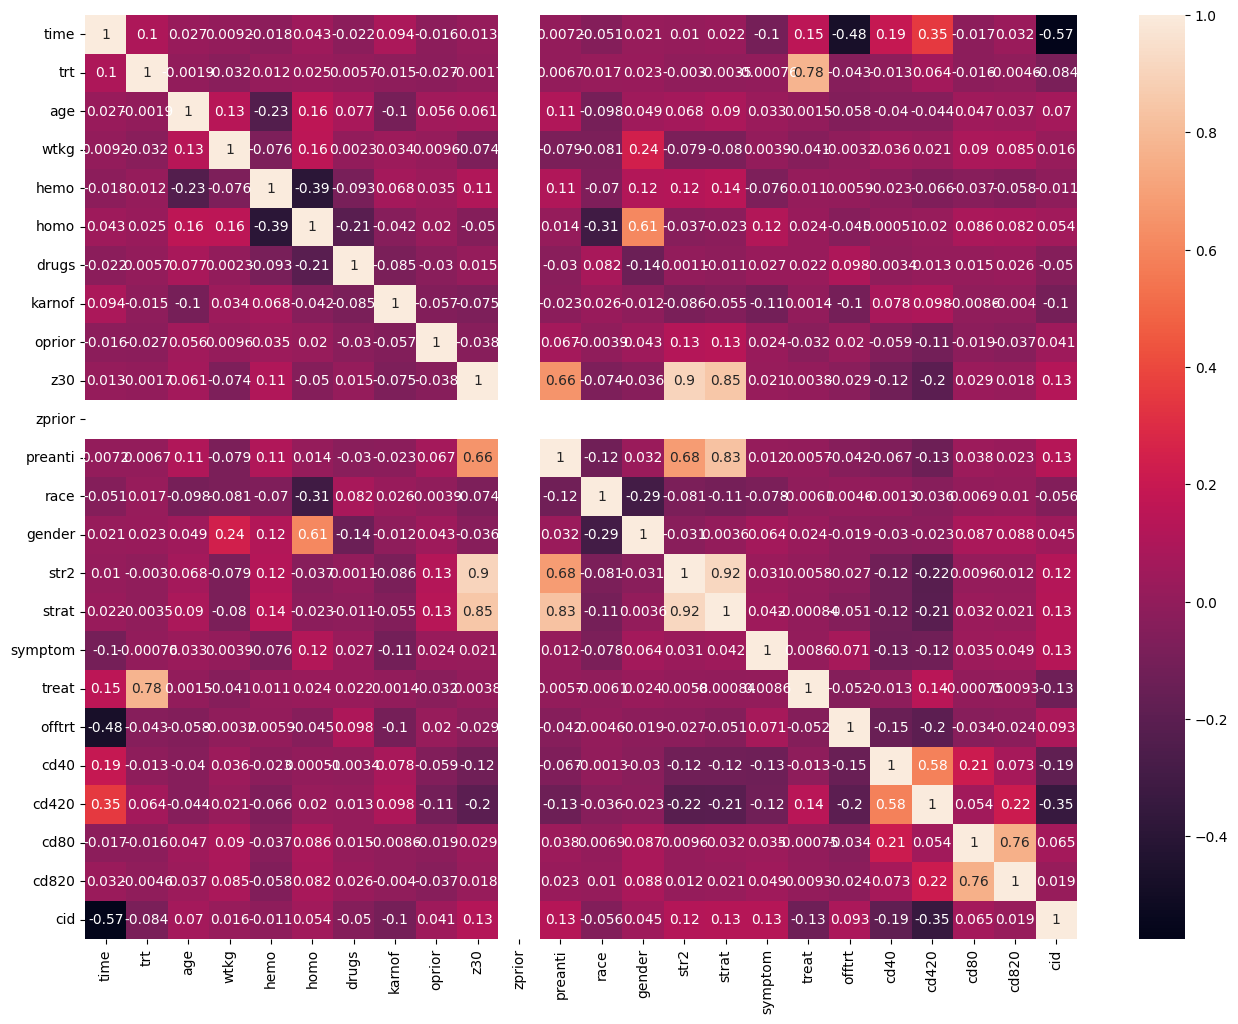

In [ ]:
corrMat=df.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(corrMat, annot=True)
#variables continuas como el propio tiempo refleja una correlación proporcionalmente inversa del 57%, mientras que el peso cuenta con una relación a penas del 1.6%, realmente el impacto que tienen es muy pobre.

b) ¿Cuáles son las tres variables con mayor correlación (positiva o negativa) con la variable objetivo? Liste y explique brevemente su relevancia.


<Axes: >

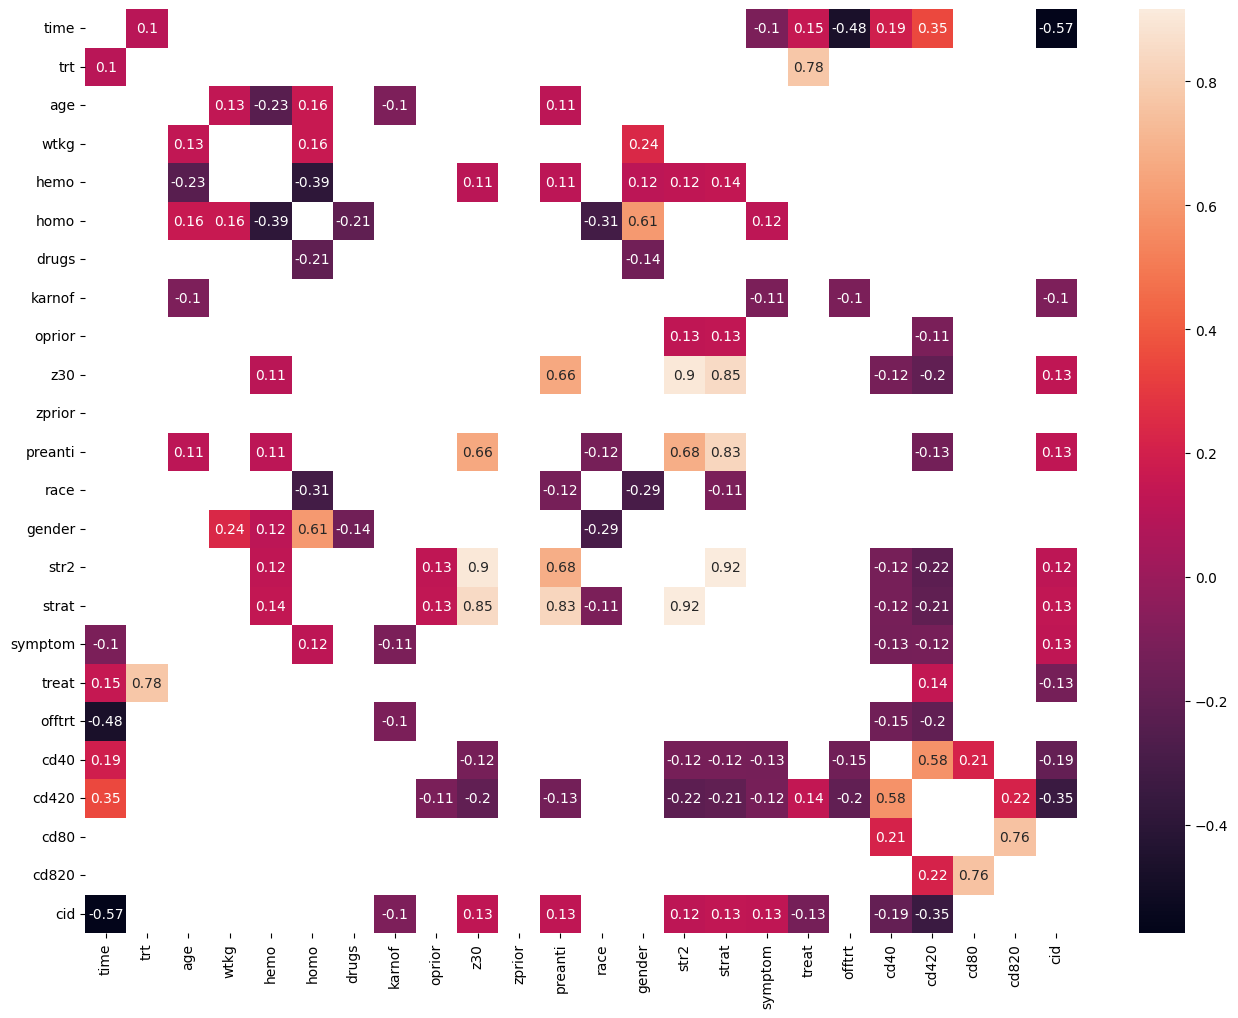

In [ ]:
strongCorr=corrMat[(corrMat.abs()>0.1)&(corrMat !=1)]
plt.figure(figsize=(16, 12))
sns.heatmap(strongCorr, annot=True)
#las tres variables con mayor correlación con el objeto de estudio son el tiempo con -0.57, cd40 con -0.19 y cd420 con -0.35. Siendo las tres inversamente proporcionales al objetivo pero con muy bajo impacto.

c) Cree un nuevo dataset que incluya únicamente las tres variables más correlacionadas con la variable objetivo (cid) junto con la propia variable objetivo. Explique por qué un conjunto de datos reducido puede mejorar el rendimiento y la eficiencia del modelo.


In [ ]:
masRelacion=['time','cd420','cd40','cid']
data2=df[masRelacion].copy()
data2.head()

#este conjunto de datos reducido mejora el rendimiento y eficiencia del modelo debido a que son las variables que más impacto tienen sobre la clasificación. El resto de variables al no poseer una correlación lo suficientemente alta no son útiles para el análisis y por tanto si son aplicadas al modelo ralentizarían sus resultados. (destacar que realmente por la correlación que poseen no tienen mucha relevancia)

,time,cd420,cd40,cid
0,0.235799,0.730927,0.603131,-0.567453
1,0.420600,-1.060207,-1.590108,1.762262
2,0.280288,-0.672935,-0.206680,-0.567453
3,0.981848,0.156934,-0.535666,-0.567453
4,0.721757,-0.126605,1.294845,-0.567453


### 3. Aprendizaje Supervisado.

a) Diga la diferencia entre clasificación y regresión, dando un ejemplo para cada caso.

b)Explica por qué dividir los datos en conjuntos de entrenamiento y prueba es crucial.

c) Describe dos métricas comunes para evaluar modelos de clasificación y su interpretación.


-------------------------------------------------------------------------------------------------------------------------------------------------------

a) La regresión se aplica para predicciones de valores continuos, mientras que la clasificación esta sujeta a resultados categoriales. Por ejemplo, la regresión puede ser útil para predecir a partir de una temperatura en grados celsius cuanto sería en grados fharenheit. En el caso de la clasificación a partir de una data sobre personas que padecen cáncer y otras que no, se puede clasificar si un paciente nuevo según sus síntomas tiene o no cáncer.

b) Dividir los datos en estos conjuntos es crucial durante el desarrollo del modelo porque una vez entrenado dicho modelo con los datos de entrenamiento se evalúa su rendimiento real con los datos de prueba. Es una opción viable ya que no es necesario buscar o recoger datos de un dataset nuevo si durante la investigación realizada existen suficientes casos de estudio. Puede darse el caso si no se aplica esta comprobación de que el modelo sea muy efectivo con la data que posee pero al analizar nuevos datos realice predicciones o clasificaciones erróneas.

c) Dos métricas usadas con frecuencia para evaluar los modelos de clasificación son la matriz de confusión, que consiste en una tabla con predicciones del modelo contra clases reales, y el accuracy que determina la proproción de predicciones correctas sobre el total. 
 